In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [206]:
df_org = pd.read_csv('data/games0108.csv', sep='\t')
pred_df_org = pd.read_csv('data/pred0108.csv', sep='\t')

In [128]:
df = pd.read_csv('data/games0108.csv', sep='\t')
pred_df = pd.read_csv('data/pred0108.csv', sep='\t')

In [129]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalsShoot,...,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,fortlfd
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,-3.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,-7.0,0.00,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,2
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,3.0,5.00,...,5.0,0.0,3.0,-3.0,0.0,0.0,0.0,3.0,0.0,3
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,-2.0,0.00,...,0.0,3.0,0.0,3.0,5.0,0.0,5.0,0.0,3.0,4
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,0.0,3.75,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5


In [130]:
pred_df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,resultNumeric,homeTotalGoalsShoot,...,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints,fortlfd
0,Bundesliga Bundesliga,2019,8,Sa,17:00,6,SK Rapid Wien,SC Rheindorf Altach,NaN,1.568627,...,-0.111111,1.666667,1.888889,-0.222222,1.444444,1.000000,0.444444,1.450980,1.166667,528
1,Bundesliga Bundesliga,2019,8,Sa,17:00,7,FC Admira Wacker Mödling,LASK,NaN,1.166667,...,-1.105263,2.190476,0.857143,1.333333,2.136364,0.772727,1.363636,0.833333,2.046512,529
2,Bundesliga Bundesliga,2019,8,Sa,17:00,6,Red Bull Salzburg,Wolfsberger AC,NaN,2.574074,...,1.448276,1.631579,1.368421,0.263158,1.388889,1.444444,-0.055556,2.518519,1.486486,530
3,Bundesliga Bundesliga,2019,8,So,17:00,8,TSV Hartberg,SK Sturm Graz,NaN,1.675676,...,-1.111111,1.263158,1.473684,-0.210526,0.952381,1.238095,-0.285714,1.216216,1.150000,531
4,Bundesliga Bundesliga,2019,8,So,17:00,8,WSG Tirol,SKN St. Pölten,NaN,1.666667,...,-2.000000,1.235294,1.411765,-0.176471,1.285714,1.857143,-0.571429,1.000000,1.184211,532


In [131]:
df_id = df['fortlfd']
pred_id = pred_df['fortlfd']

df = df.drop("fortlfd", axis = 1)
pred_df = pred_df.drop("fortlfd", axis = 1)

df.shape, pred_df.shape

((527, 29), (6, 29))

In [132]:
df_id.head()

0    1
1    2
2    3
3    4
4    5
Name: fortlfd, dtype: int64

In [133]:
pred_id.head()

0    528
1    529
2    530
3    531
4    532
Name: fortlfd, dtype: int64

In [134]:
# df['result'] = np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))

In [135]:
y_reg = df.resultNumeric
y_cat = (pd.get_dummies(np.where(df.resultNumeric < 0, 'lost', np.where(df.resultNumeric > 0, 'won', 'draw'))))

In [136]:
ndf = df.shape[0]
npred = pred_df.shape[0]


df = pd.concat([df, pred_df])
df = df.drop(['resultNumeric'], axis=1)

df.shape

(533, 28)

In [137]:
ndf, npred

(527, 6)

In [138]:
df.head()

,contest,year,month,day,time,break,hoamTeam,guestTeam,homeTotalGoalsShoot,homeTotalGoalsReceived,...,homeTeamGoalsReceivedAway,homeTeamGoalsDiffAway,guestTeamGoalsShootAtHome,guestTeamGoalsReceivedAtHome,guestTeamGoalsDiffAtHome,guestTeamGoalsShootAway,guestTeamGoalsReceivedAway,guestTeamGoalsDiffAway,hoamAvgPoints,guestAvgpoints
0,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Di,20:30,45,Hibernians FC,Red Bull Salzburg,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ÖFB-Cup ÖFB-Cup,2017,7,Sa,17:00,4,Deutschlandsberger SC,Red Bull Salzburg,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0
2,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,20:30,4,Red Bull Salzburg,Hibernians FC,5.00,0.0,...,0.0,5.0,0.0,3.0,-3.0,0.0,0.0,0.0,3.0,0.0
3,Bundesliga Bundesliga,2017,7,Sa,18:30,3,Wolfsberger AC,Red Bull Salzburg,0.00,0.0,...,0.0,0.0,3.0,0.0,3.0,5.0,0.0,5.0,0.0,3.0
4,UEFA CL-Qualifikation UEFA Champions League-Q...,2017,7,Mi,18:45,4,Red Bull Salzburg,HNK Rijeka,3.75,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [139]:
from keras.utils import to_categorical

In [140]:
df_contest = pd.get_dummies(df.contest)
df = pd.concat([df, df_contest], axis=1)
df = df.drop('contest', axis=1)

In [141]:
df_day = pd.get_dummies(df.day)
df = pd.concat([df, df_day], axis=1)
df = df.drop('day', axis=1)

In [142]:
df_time = pd.get_dummies(df.time)
df = pd.concat([df, df_time], axis=1)
df = df.drop('time', axis=1)

In [143]:
df_hoamTeam = pd.get_dummies(df.hoamTeam)
df = pd.concat([df, df_hoamTeam], axis=1)
df = df.drop('hoamTeam', axis=1)

In [144]:
df_guestTeam = pd.get_dummies(df.guestTeam)
df = pd.concat([df, df_guestTeam], axis=1)
df = df.drop('guestTeam', axis=1)

In [145]:
df.shape

(533, 203)

In [152]:
df.head()

,year,month,break,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,...,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,WSG Wattens,Wolfsberger AC,ZSKA Sofia
0,2017,7,45,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2017,7,4,0.00,0.0,0.00,3.000000,0.0,3.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2017,7,4,5.00,0.0,5.00,0.000000,3.0,-3.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2017,7,3,0.00,0.0,0.00,4.333333,0.0,4.333333,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2017,7,4,3.75,0.0,3.75,0.000000,0.0,0.000000,3.0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 5
Columns: 203 entries, year to ZSKA Sofia
dtypes: float64(20), int64(3), uint8(180)
memory usage: 193.6 KB


In [154]:
X = df[:ndf]
pred_df = df[ndf:]

In [155]:
X.shape, pred_df.shape

((527, 203), (6, 203))

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_cat, test_size=0.2, random_state=123)

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, BatchNormalization
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_monitor = EarlyStopping(patience=4)

In [161]:
model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True, monitor='val_Classification_acc')

In [162]:
in_cols=X_train.shape[1]
out_cols=y_cat.shape[1]

in_cols, out_cols

(203, 3)

In [163]:
model_1 = Sequential()

model_1.add(Dense(12, input_shape=(in_cols,), activation='relu', ))
model_1.add(Dense(12, activation='relu'))
model_1.add(Dense(1))


In [164]:
model_1.compile(optimizer='adam', loss='mse')

In [165]:
model_1_training = model_1.fit(
    X_train_scaled,
    y_reg_train,
    validation_data=[X_test_scaled,y_reg_test],
    epochs=100
)

Train on 421 samples, validate on 106 samples
Epoch 1/100
421/421 [==============================] - 1s 3ms/step - loss: 5.5714 - val_loss: 4.7566
Epoch 2/100
421/421 [==============================] - 0s 121us/step - loss: 4.8926 - val_loss: 4.6096
Epoch 3/100
421/421 [==============================] - 0s 114us/step - loss: 4.4820 - val_loss: 4.5257
Epoch 4/100
421/421 [==============================] - 0s 133us/step - loss: 4.2041 - val_loss: 4.4695
Epoch 5/100
421/421 [==============================] - 0s 140us/step - loss: 3.9597 - val_loss: 4.3970
Epoch 6/100
421/421 [==============================] - 0s 114us/step - loss: 3.7569 - val_loss: 4.3341
Epoch 7/100
421/421 [==============================] - 0s 121us/step - loss: 3.5590 - val_loss: 4.2925
Epoch 8/100
421/421 [==============================] - 0s 124us/step - loss: 3.3850 - val_loss: 4.2506
Epoch 9/100
421/421 [==============================] - 0s 133us/step - loss: 3.2268 - val_loss: 4.2091
Epoch 10/100
421/421 [=======

Epoch 79/100
421/421 [==============================] - 0s 219us/step - loss: 0.7307 - val_loss: 6.0556
Epoch 80/100
421/421 [==============================] - 0s 188us/step - loss: 0.7166 - val_loss: 5.9505
Epoch 81/100
421/421 [==============================] - 0s 119us/step - loss: 0.7020 - val_loss: 5.9263
Epoch 82/100
421/421 [==============================] - 0s 121us/step - loss: 0.6891 - val_loss: 6.0372
Epoch 83/100
421/421 [==============================] - 0s 124us/step - loss: 0.6695 - val_loss: 6.1062
Epoch 84/100
421/421 [==============================] - 0s 116us/step - loss: 0.6548 - val_loss: 6.1144
Epoch 85/100
421/421 [==============================] - 0s 195us/step - loss: 0.6455 - val_loss: 6.0696
Epoch 86/100
421/421 [==============================] - 0s 145us/step - loss: 0.6363 - val_loss: 6.2168
Epoch 87/100
421/421 [==============================] - 0s 169us/step - loss: 0.6155 - val_loss: 6.1922
Epoch 88/100
421/421 [==============================] - 0s 154us

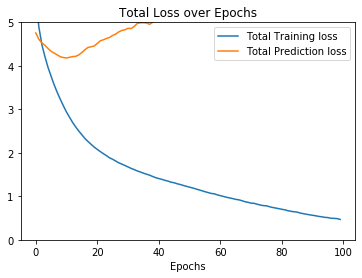

In [166]:
plt.plot(model_1_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 5])
plt.title('Total Loss over Epochs')
plt.plot(model_1_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [168]:
rfr = RandomForestRegressor(n_estimators=1000)

rfr.fit(X_train, y_reg_train)
rfr.score(X_train, y_reg_train)

0.8908537516954287

In [169]:
rfr.score(X_test, y_reg_test)
pred_y = rfr.predict(X_test)

In [170]:
np.sqrt(mean_squared_error(np.exp(y_reg_test), np.exp(pred_y)))

40.38322524795849

In [171]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(8, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(16, activation='relu', name='hidden_2')(batch_1)
batch_2 = BatchNormalization()(hidden_2)
hidden_3 = Dense(16, activation='relu', name='hidden_3')(batch_2)
output_tensor_reg = Dense(1, name='Regression')(hidden_3)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [172]:
model_2 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [173]:
model_2.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [174]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 203)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 8)                 1632      
_________________________________________________________________
batch_normalization_4 (Batch (None, 8)                 32        
_________________________________________________________________
hidden_2 (Dense)             (None, 16)                144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 16)                64        
_________________________________________________________________
hidden_3 (Dense)             (None, 16)                272       
_________________________________________________________________
Regression (Dense)           (None, 1)                 17        
__________

In [175]:
model_2_training = model_2.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor],
    verbose=True)

Train on 421 samples, validate on 106 samples
Epoch 1/50
421/421 [==============================] - 4s 10ms/step - loss: 5.5818 - Regression_loss: 4.4874 - Classification_loss: 1.0944 - Regression_acc: 0.2185 - Classification_acc: 0.3302 - val_loss: 86778.9850 - val_Regression_loss: 86770.0757 - val_Classification_loss: 8.9092 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3585
Epoch 2/50
421/421 [==============================] - 2s 5ms/step - loss: 5.5611 - Regression_loss: 4.4757 - Classification_loss: 1.0854 - Regression_acc: 0.2185 - Classification_acc: 0.3967 - val_loss: 93174.7125 - val_Regression_loss: 93165.8018 - val_Classification_loss: 8.9106 - val_Regression_acc: 0.0000e+00 - val_Classification_acc: 0.3774
Epoch 3/50
421/421 [==============================] - 2s 5ms/step - loss: 5.5455 - Regression_loss: 4.4670 - Classification_loss: 1.0785 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 94259.7824 - val_Regression_loss: 94250.9108 - val_Cla

In [176]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols, activation='relu', name='hidden_1')(input_tensor)
batch_1 = BatchNormalization()(hidden_1)
hidden_2 = Dense(in_cols, activation='relu', name='hidden_2')(batch_1)
output_tensor_reg = Dense(1, name='Regression')(hidden_2)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [177]:
model_3 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [178]:
model_3.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [179]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 203)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 203)               41412     
_________________________________________________________________
batch_normalization_6 (Batch (None, 203)               812       
_________________________________________________________________
hidden_2 (Dense)             (None, 203)               41412     
_________________________________________________________________
Regression (Dense)           (None, 1)                 204       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 83,846
Trainable params: 83,440
Non-trainable params: 406
_________________________________________________________________


In [180]:
model_3_training = model_3.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=100,
    #callbacks=[early_stopping_monitor],
    verbose=True)

Train on 421 samples, validate on 106 samples
Epoch 1/100
421/421 [==============================] - 5s 12ms/step - loss: 5.5825 - Regression_loss: 4.4868 - Classification_loss: 1.0956 - Regression_acc: 0.2185 - Classification_acc: 0.4252 - val_loss: 201.0332 - val_Regression_loss: 198.0490 - val_Classification_loss: 2.9842 - val_Regression_acc: 0.0377 - val_Classification_acc: 0.3302
Epoch 2/100
421/421 [==============================] - 3s 7ms/step - loss: 5.5668 - Regression_loss: 4.4784 - Classification_loss: 1.0884 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 194.0282 - val_Regression_loss: 191.3543 - val_Classification_loss: 2.6739 - val_Regression_acc: 0.0377 - val_Classification_acc: 0.3302
Epoch 3/100
421/421 [==============================] - 3s 8ms/step - loss: 5.5541 - Regression_loss: 4.4715 - Classification_loss: 1.0826 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 199.3739 - val_Regression_loss: 196.8966 - val_Classification_loss:

Epoch 25/100
421/421 [==============================] - 3s 8ms/step - loss: 5.5169 - Regression_loss: 4.4531 - Classification_loss: 1.0638 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 206.6658 - val_Regression_loss: 205.2354 - val_Classification_loss: 1.4304 - val_Regression_acc: 0.0283 - val_Classification_acc: 0.4528
Epoch 26/100
421/421 [==============================] - 3s 6ms/step - loss: 5.5162 - Regression_loss: 4.4526 - Classification_loss: 1.0636 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 206.0801 - val_Regression_loss: 204.6507 - val_Classification_loss: 1.4294 - val_Regression_acc: 0.0377 - val_Classification_acc: 0.4528
Epoch 27/100
421/421 [==============================] - 3s 6ms/step - loss: 5.5165 - Regression_loss: 4.4528 - Classification_loss: 1.0637 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 201.1291 - val_Regression_loss: 199.6490 - val_Classification_loss: 1.4801 - val_Regression_acc: 0.0000e+00 - v

Epoch 72/100
421/421 [==============================] - 3s 7ms/step - loss: 5.5166 - Regression_loss: 4.4530 - Classification_loss: 1.0636 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 191.1375 - val_Regression_loss: 189.6861 - val_Classification_loss: 1.4514 - val_Regression_acc: 0.0283 - val_Classification_acc: 0.4245
Epoch 73/100
421/421 [==============================] - 3s 7ms/step - loss: 5.5164 - Regression_loss: 4.4527 - Classification_loss: 1.0637 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 200.5189 - val_Regression_loss: 199.1274 - val_Classification_loss: 1.3916 - val_Regression_acc: 0.0189 - val_Classification_acc: 0.4434
Epoch 74/100
421/421 [==============================] - 3s 6ms/step - loss: 5.5165 - Regression_loss: 4.4528 - Classification_loss: 1.0636 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 193.2143 - val_Regression_loss: 191.7993 - val_Classification_loss: 1.4150 - val_Regression_acc: 0.0189 - val_C

Epoch 96/100
421/421 [==============================] - 3s 7ms/step - loss: 5.5180 - Regression_loss: 4.4542 - Classification_loss: 1.0638 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 194.0230 - val_Regression_loss: 192.6464 - val_Classification_loss: 1.3766 - val_Regression_acc: 0.0283 - val_Classification_acc: 0.4340
Epoch 97/100
421/421 [==============================] - 3s 7ms/step - loss: 5.5165 - Regression_loss: 4.4528 - Classification_loss: 1.0637 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 198.7192 - val_Regression_loss: 197.3913 - val_Classification_loss: 1.3280 - val_Regression_acc: 0.0472 - val_Classification_acc: 0.4340
Epoch 98/100
421/421 [==============================] - 3s 6ms/step - loss: 5.5164 - Regression_loss: 4.4527 - Classification_loss: 1.0637 - Regression_acc: 0.2185 - Classification_acc: 0.4276 - val_loss: 196.5711 - val_Regression_loss: 195.1382 - val_Classification_loss: 1.4328 - val_Regression_acc: 0.0566 - val_C

In [181]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(11.462805, array([0.0648931, 0.0077849, 0.2104663], dtype=float32))

In [182]:
input_tensor = Input(shape=(in_cols,))
hidden_1 = Dense(in_cols*2, activation='relu', name='hidden_1')(input_tensor)
output_tensor_reg = Dense(1, name='Regression')(hidden_1)

output_tensor_class = Dense(out_cols, activation='sigmoid', name='Classification')(output_tensor_reg)

In [183]:
model_4 = Model(input_tensor, [output_tensor_reg, output_tensor_class])

In [184]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [185]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 203)               0         
_________________________________________________________________
hidden_1 (Dense)             (None, 406)               82824     
_________________________________________________________________
Regression (Dense)           (None, 1)                 407       
_________________________________________________________________
Classification (Dense)       (None, 3)                 6         
Total params: 83,237
Trainable params: 83,237
Non-trainable params: 0
_________________________________________________________________


In [186]:
model_4_training = model_4.fit(
    X_train_scaled,
    [y_reg_train, y_class_train],
    validation_data=(X_test_scaled, [y_reg_test, y_class_test]),
    batch_size=1,
    epochs=50,
    callbacks=[early_stopping_monitor, model_save],
    verbose=True)

Train on 421 samples, validate on 106 samples
Epoch 1/50
421/421 [==============================] - 6s 14ms/step - loss: 5.9652 - Regression_loss: 4.8561 - Classification_loss: 1.1092 - Regression_acc: 0.1829 - Classification_acc: 0.3135 - val_loss: 5.9913 - val_Regression_loss: 4.8995 - val_Classification_loss: 1.0918 - val_Regression_acc: 0.2170 - val_Classification_acc: 0.3208
Epoch 2/50
421/421 [==============================] - 3s 7ms/step - loss: 4.6323 - Regression_loss: 3.5768 - Classification_loss: 1.0555 - Regression_acc: 0.2233 - Classification_acc: 0.5297 - val_loss: 5.5518 - val_Regression_loss: 4.4871 - val_Classification_loss: 1.0647 - val_Regression_acc: 0.2075 - val_Classification_acc: 0.4906
Epoch 3/50
421/421 [==============================] - 3s 8ms/step - loss: 3.7122 - Regression_loss: 2.7068 - Classification_loss: 1.0054 - Regression_acc: 0.2542 - Classification_acc: 0.5843 - val_loss: 5.3886 - val_Regression_loss: 4.3568 - val_Classification_loss: 1.0318 - val_R

In [187]:
model_3.predict(X_test_scaled)[0][6][0], model_3.predict(X_test_scaled)[1][6]

(11.462805, array([0.0648931, 0.0077849, 0.2104663], dtype=float32))

In [188]:
model_4.predict(X_test_scaled)[0][6][0], model_4.predict(X_test_scaled)[1][6]

(0.45792094, array([0.3171984 , 0.29628068, 0.58179057], dtype=float32))

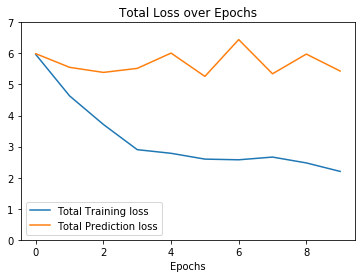

In [189]:
plt.plot(model_4_training.history['loss'])
plt.xlabel('Epochs')
plt.ylim([0, 7])
plt.title('Total Loss over Epochs')
plt.plot(model_4_training.history['val_loss'])
plt.legend(['Total Training loss', 'Total Prediction loss'])

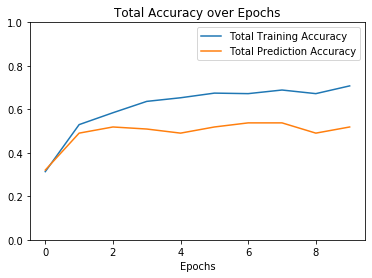

In [190]:
plt.plot(model_4_training.history['Classification_acc'])
plt.xlabel('Epochs')
plt.ylim([0, 1])
plt.title('Total Accuracy over Epochs')
plt.plot(model_4_training.history['val_Classification_acc'])
plt.legend(['Total Training Accuracy', 'Total Prediction Accuracy'])

In [191]:
model_4_prediction = pd.DataFrame(model_4.predict(X_test_scaled)[1])
model_4_prediction.columns = ['draw', 'lost', 'won']

In [231]:
model_4_prediction.head()

,draw,lost,won
0,0.349967,0.456649,0.461337
1,0.312514,0.275509,0.599061
2,0.354547,0.480072,0.444976
3,0.467312,0.892292,0.146693
4,0.222483,0.041643,0.872570


In [232]:
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm

array([[ 0,  9, 11],
       [ 0, 33, 12],
       [ 0, 19, 22]], dtype=int64)

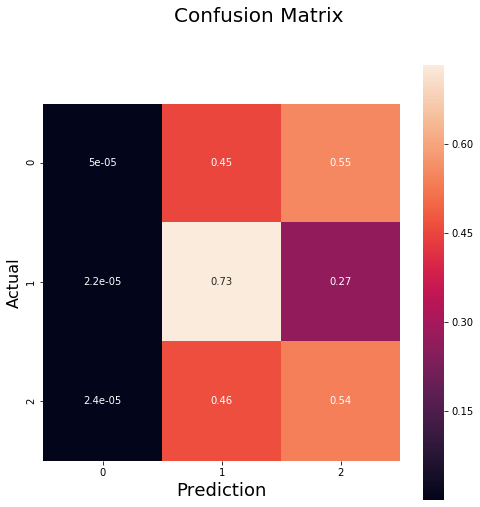

In [203]:
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1, 1, figsize=(8,8))
cm = confusion_matrix([np.argmax(x) for x in y_class_test.values], [np.argmax(x) for x in model_4_prediction.values])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, ax = ax, annot=True, square=True)
fig.suptitle('Confusion Matrix', fontsize=20)
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actual', fontsize=16)
plt.show()


#### michi code
def pretty_confusion(target, prediction):
    """Prettify the on-board confusion matrix of sklearn."""
    
    cmc = ["Condition positive", "Condition negative"]
    cmi = ["Predicted condition positive", "Predicted condition negative"]
    
    matrix = confusion_matrix(target, prediction)
    cm = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return pd.DataFrame(cm , columns=cmc, index=cmi)

In [193]:
cm

array([[0.        , 0.45      , 0.55      ],
       [0.        , 0.73333333, 0.26666667],
       [0.        , 0.46341463, 0.53658537]])

In [194]:
y_class_test

,draw,lost,won
11,0,0,1
444,0,0,1
414,0,0,1
150,1,0,0
473,1,0,0
75,0,0,1
504,0,0,1
102,0,0,1
424,0,0,1
291,0,0,1


In [195]:
scaler.fit(pred_df)

pred_df_scaled = scaler.transform(pred_df)


In [196]:
model_4.predict(pred_df_scaled)

[array([[-0.85371435],
        [-1.7321906 ],
        [ 1.4891704 ],
        [-0.6323925 ],
        [ 1.0574123 ],
        [ 0.24048339]], dtype=float32),
 array([[0.40706712, 0.72419906, 0.27799165],
        [0.4714028 , 0.89947   , 0.14005929],
        [0.25468898, 0.09077257, 0.79250664],
        [0.3912627 , 0.65847826, 0.32350945],
        [0.27985293, 0.15424398, 0.71448165],
        [0.33138463, 0.36317125, 0.52926075]], dtype=float32)]

In [197]:
y_cat.head()

,draw,lost,won
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,1,0,0


In [198]:
pred_df

,year,month,break,homeTotalGoalsShoot,homeTotalGoalsReceived,homeTotalGoalDiff,guestTotalGoalsShoot,guestTotalGoalsReceived,guestTotalGoalDiff,homeTeamGoalsShootAtHome,...,SV Wimpassing,Shkendija Tetovo,Slovan Bratislava,Spartak Moskau,TSV Hartberg,Vitória Guimarães SC,WSG Tirol,WSG Wattens,Wolfsberger AC,ZSKA Sofia
0,2019,8,6,1.568627,0.411765,1.156863,1.555556,1.444444,0.111111,1.458333,...,0,0,0,0,0,0,0,0,0,0
1,2019,8,7,1.166667,0.972222,0.194444,2.162791,0.813953,1.348837,1.352941,...,0,0,0,0,0,0,0,0,0,0
2,2019,8,6,2.574074,0.277778,2.296296,1.513514,1.405405,0.108108,2.760000,...,0,0,0,0,0,0,0,0,1,0
3,2019,8,8,1.675676,0.729730,0.945946,1.100000,1.350000,-0.250000,1.736842,...,0,0,0,0,0,0,0,0,0,0
4,2019,8,8,1.666667,0.333333,1.333333,1.263158,1.657895,-0.394737,3.000000,...,0,0,0,0,0,0,0,0,0,0
5,2019,8,7,1.371429,0.685714,0.685714,1.473684,1.500000,-0.026316,1.470588,...,0,0,0,0,0,0,0,0,0,0


In [199]:
model_4.load_weights("best_model.hdf5")

In [200]:
model_4.compile(loss=['mse', 'categorical_crossentropy'],
             optimizer='adam',
             metrics=['accuracy'])

In [214]:
model_4_final_prediction = model_4.predict(pred_df_scaled)
model_4_final_prediction

[array([[-0.68542755],
        [-2.7657099 ],
        [ 1.997426  ],
        [ 0.16938458],
        [ 1.078272  ],
        [ 0.19402003]], dtype=float32),
 array([[0.42305166, 0.64697665, 0.4080221 ],
        [0.57607234, 0.94603014, 0.15363088],
        [0.24863863, 0.090597  , 0.79389817],
        [0.3626775 , 0.42016596, 0.54391474],
        [0.3029474 , 0.2127116 , 0.68114877],
        [0.36099052, 0.41366538, 0.54783165]], dtype=float32)]

In [234]:
r_prediction = [0.1947315, -0.9286356,  2.6105324,  0.5403936,  1.2018728,  0.8545508]

In [238]:
final_df = pd.concat([pred_df_org["hoamTeam"], pred_df_org["guestTeam"], pd.DataFrame(model_4_final_prediction[0]), pd.DataFrame(r_prediction)], axis=1)
final_df.columns = ['hoamTeam', 'guestTeam', 'resultNumeric', 'r_pred']
final_df

,hoamTeam,guestTeam,resultNumeric,r_pred
0,SK Rapid Wien,SC Rheindorf Altach,-0.685428,0.194732
1,FC Admira Wacker Mödling,LASK,-2.765710,-0.928636
2,Red Bull Salzburg,Wolfsberger AC,1.997426,2.610532
3,TSV Hartberg,SK Sturm Graz,0.169385,0.540394
4,WSG Tirol,SKN St. Pölten,1.078272,1.201873
5,SV Mattersburg,FK Austria Wien,0.194020,0.854551
